## Food and Nutrition

Nutrition provides the fuel our bodies need—through water, fats, proteins, and carbohydrates. It involves processes like ingestion, absorption, and excretion, all essential for growth, health, and disease prevention.

Eating mindfully supports both gut health and mental peace. A balanced diet rich in fruits, vegetables, and whole grains can help prevent conditions like heart disease, stroke, and diabetes. While occasional indulgence is fine, maintaining a healthy balance is key.


In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [32]:
nutrients = pd.read_csv("F:\\project1.1\\.vscode\\my_project\\Nutritional-most common foods\\nutrients_csvfile.csv")

In [33]:
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [34]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


## Replace only 't' and "t'" in string/object columns with 0

In [35]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


## Now, we need to remove all the expressions like commas from the dataset so as to convert the numerical data to the respective integer or float variables.

In [36]:
# Remove commas only in object-type columns
for col in nutrients.select_dtypes(include='object').columns:
    nutrients[col] = nutrients[col].str.replace(",", "", regex=False)
# Remove 'a' in the 'Fiber' column if it's a string column
nutrients['Fiber'] = nutrients['Fiber'].astype(str).str.replace("a", "", regex=False)
# Convert 'Fiber' and 'Calories' columns to numeric
nutrients['Fiber'] = pd.to_numeric(nutrients['Fiber'], errors='coerce')
nutrients['Calories'] = pd.to_numeric(nutrients['Calories'], errors='coerce')
# Set value safely using .loc
nutrients.loc[91, 'Calories'] = (8 + 44) / 2


## Now, let us convert grams, calories, protein, fat, saturated fat, fiber and carbs datatypes to int.

In [37]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [38]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein     float64
Fat         float64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

# Quick last checks on data quality

In [39]:
print('-'*245)
print(nutrients.isnull().any())
print('-'*245)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Food        False
Measure     False
Grams       False
Calories     True
Protein      True
Fat          True
Sat.Fat      True
Fiber        True
Carbs        True
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [40]:
print('-'*245)
print(nutrients.describe())
print('-'*245)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  296.000000  219.000000  318.000000   
mean    143.211940   188.802395    9.702703   13.063927    6.742138   
std     138.668626   184.453018   18.575895   23.262671   18.896435   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    1.000000    0.000000   
50%     108.000000   131.000000    4.000000    8.000000    0.000000   
75%     200.000000   250.000000   13.000000   14.000000    8.000000   
max    1419.000000  1373.000000  232.000000  233.000000  234.000000   

            Fiber       Carbs  
count  308.000000  322.000000  
mean     2.576656   25.990994  
std     16.729786 

In [41]:
nutrients.shape

(335, 10)

### Data Visualization and Analysis

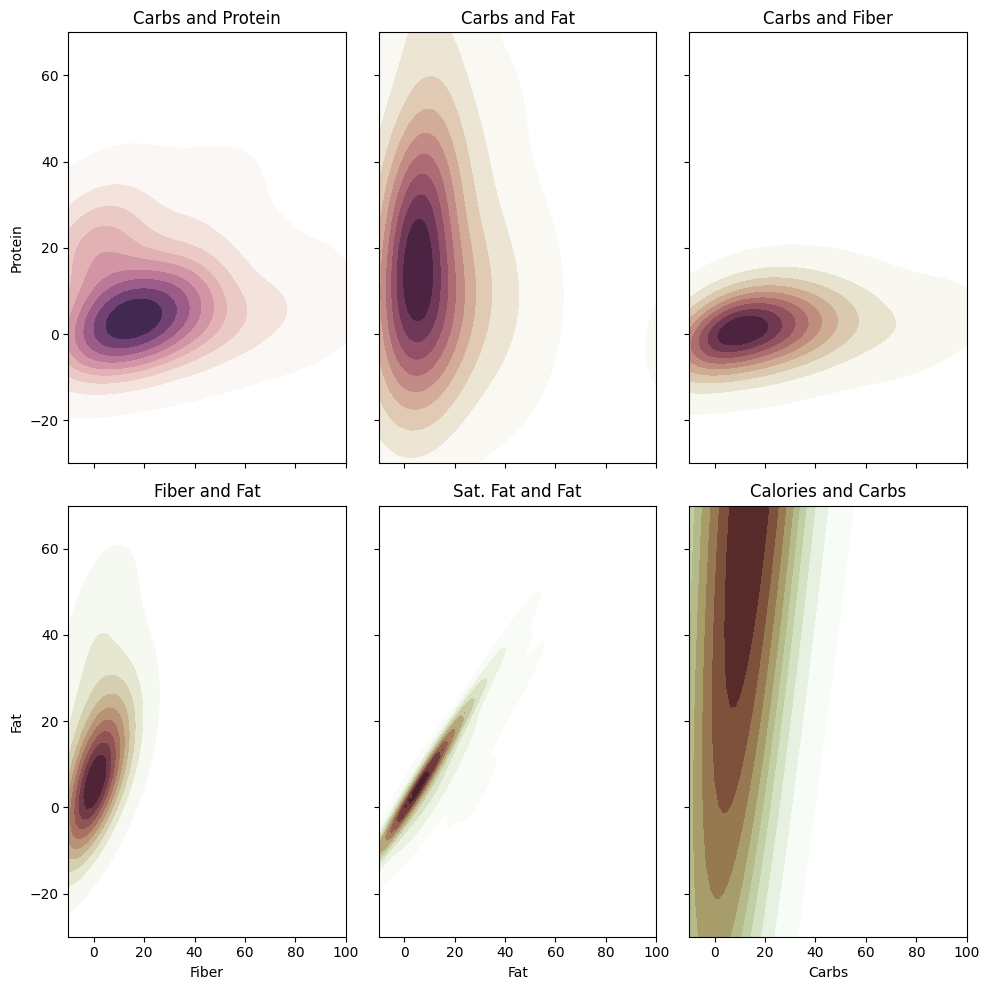

In [42]:
# Create a 2x3 grid of subplots (axes) with shared X and Y axes
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

# Create a linear space (not used here, but may be for other computations)
s = np.linspace(0, 3, 10)

# --- First Plot: Carbs vs Protein ---
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Protein'], cmap=cmap, fill=True, ax=axes[0, 0])
axes[0, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Protein')

# --- Second Plot: Fat vs Carbs ---
cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Carbs'], cmap=cmap, fill=True, ax=axes[0, 1])
axes[0, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fat')

# --- Third Plot: Carbs vs Fiber ---
cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Fiber'], cmap=cmap, fill=True, ax=axes[0, 2])
axes[0, 2].set(xlim=(-10, 50), ylim=(-30, 70), title='Carbs and Fiber')

# --- Fourth Plot: Fiber vs Fat ---
cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fiber'], y=nutrients['Fat'], cmap=cmap, fill=True, ax=axes[1, 0])
axes[1, 0].set(xlim=(-10, 50), ylim=(-30, 70), title='Fiber and Fat')

# --- Fifth Plot: Fat vs Saturated Fat ---
cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Fat'], y=nutrients['Sat.Fat'], cmap=cmap, fill=True, ax=axes[1, 1])
axes[1, 1].set(xlim=(-10, 50), ylim=(-30, 70), title='Sat. Fat and Fat')

# --- Sixth Plot: Carbs vs Calories ---
cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)
sns.kdeplot(x=nutrients['Carbs'], y=nutrients['Calories'], cmap=cmap, fill=True, ax=axes[1, 2])
axes[1, 2].set(xlim=(-10, 100), ylim=(-30, 70), title='Calories and Carbs')

# Adjust layout so subplots don’t overlap
f.tight_layout()


#### What is the most protein rich food in the category of vegetables and grains?

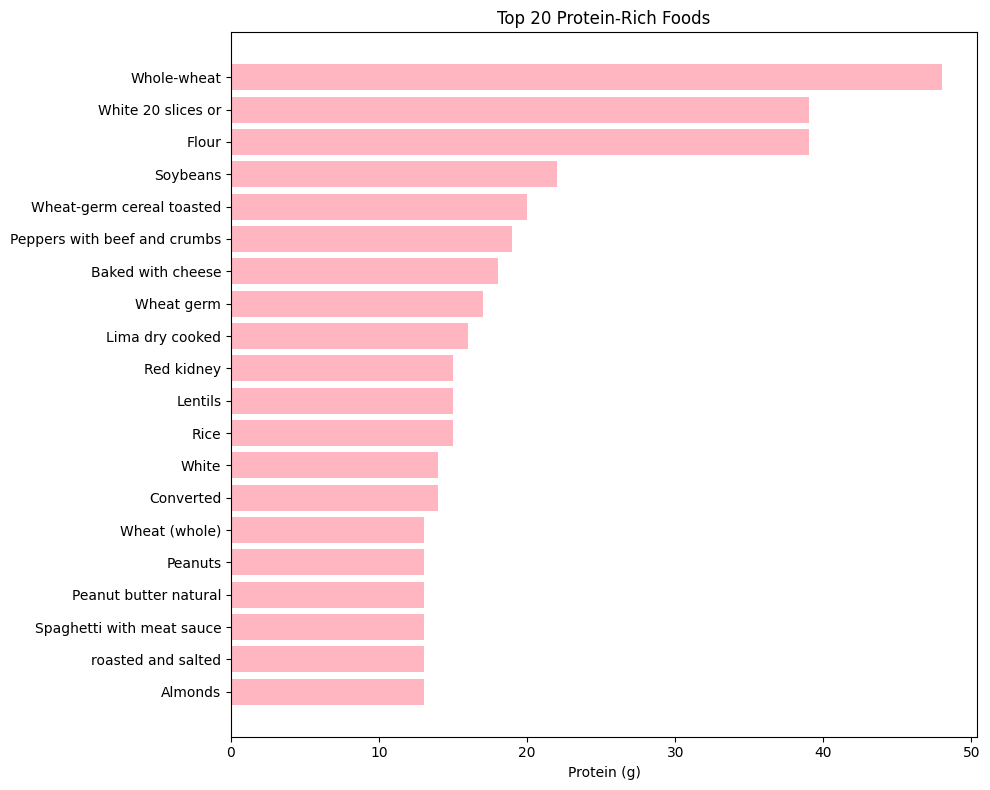

In [43]:
# Define categories to filter
categories = ['Vegetables A-E', 'Vegetables F-P', 'Vegetables R-Z',
              'Breads cereals fastfoodgrains', 'Seeds and Nuts']

# Filter the data
filtered_data = nutrients[nutrients['Category'].isin(categories)]

# Get top 20 foods with highest protein
top_protein_foods = filtered_data.sort_values('Protein', ascending=False).head(20)

# Sort again for better horizontal bar display
top_protein_foods = top_protein_foods.sort_values('Protein')  # so the smallest is on top

# Plot using matplotlib
plt.figure(figsize=(10, 8))
plt.barh(top_protein_foods['Food'], top_protein_foods['Protein'], color='lightpink')
plt.xlabel('Protein (g)')
plt.title('Top 20 Protein-Rich Foods')
plt.tight_layout()
plt.show()

## Foods to stay away from:
What food has the most calories?

In [44]:
# Step 1: Sort by Calories
top_20_cals = nutrients.sort_values(by='Calories', ascending=False).head(20)

In [45]:
# Step 2: Sort again for cleaner bar layout
top_20_cals = top_20_cals.sort_values(by='Calories')  # small to large for horizontal bars

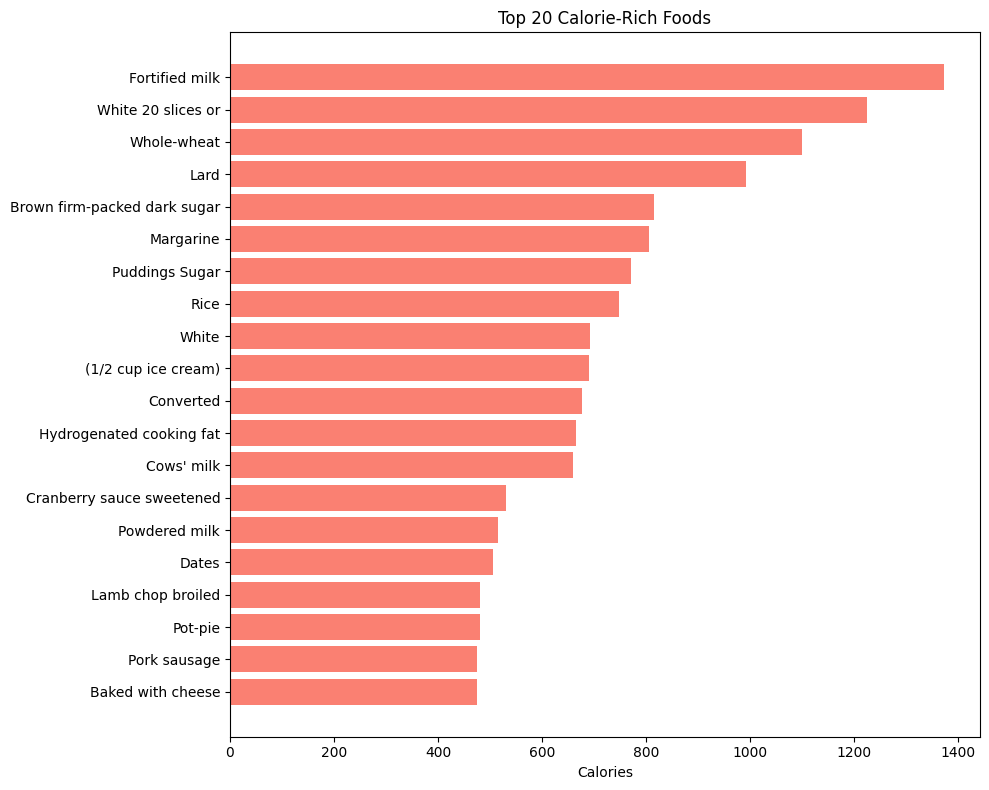

In [46]:
# Step 3: Plot with Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(top_20_cals['Food'], top_20_cals['Calories'], color='salmon')
plt.xlabel('Calories')
plt.title('Top 20 Calorie-Rich Foods')
plt.tight_layout()
plt.show()

Fortified milk has the most calories, followed by white bread. Also, notice how whole wheat has the most proteins but has almost equal amount of calories. Lard is fat source with most calories and 1/2 cup of ice-creams tops the charts in the dessert category.

# Fat Content:
### Normally, fat sources are often looked down upon. But, a certain amount of fat is required for a healthy gut. Let's look at some fatty foods

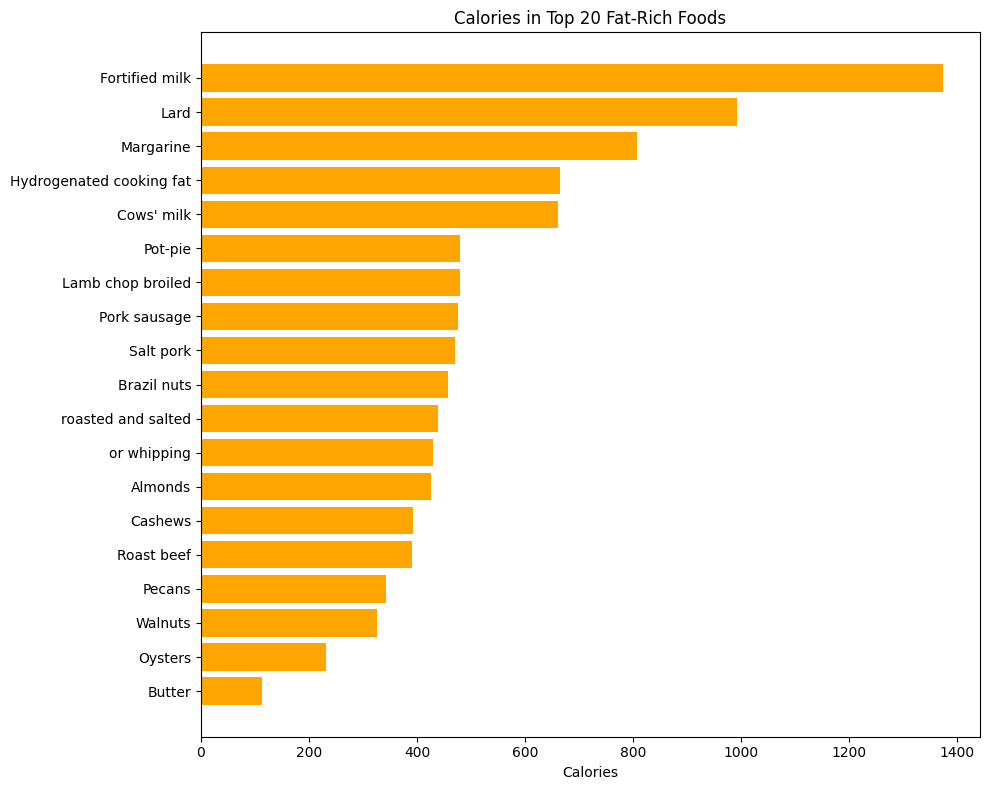

In [47]:
# Get top 20 fat-rich foods
top_20_fat = nutrients.sort_values(by='Fat', ascending=False).head(20)

# Sort by calories for cleaner display
top_20_fat = top_20_fat.sort_values(by='Calories')

# Horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_20_fat['Food'], top_20_fat['Calories'], color='orange')
plt.xlabel('Calories')
plt.title('Calories in Top 20 Fat-Rich Foods')
plt.tight_layout()
plt.show()

#### Therefore, Oysters and Butter have the largest combination of calories and fats, followed by lard.

# Analysing categories
##### Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.

In [48]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,,,
Breads cereals fastfoodgrains,BiscuitsBran flakesBread cracked wheatRyeWhite...,11 cup1 slice1 slice1-lb. loaf1-lb. loaf1 slic...,5253,11921.0,403.0,207.0,99.0,115.91,2059.0
Dairy products,Cows' milkMilk skimButtermilkEvaporated undilu...,1 qt.1 qt.1 cup1 cup6 cups1 cup1 1/3 cups2/3 c...,7412,8434.0,503.0,396.0,322.0,4.40,651.0
Desserts sweets,Apple bettyBread puddingCakesChocolate fudgeCu...,1 serving3/4 cup1 slice1 slice11 slice1 slice1...,2958,6608.0,78.0,163.0,150.0,20.50,1184.0
DrinksAlcohol Beverages,BeerGinWinesTable (12.2% alcohol)Carbonated dr...,2 cups1 oz.1/2 cup1/2 cup12 oz.12 oz.12 oz.12 ...,3284,1112.0,0.0,0.0,0.0,0.00,167.0
Fats Oils Shortenings,YolksButterButterButterHydrogenated cooking fa...,21T.1/2 cup1/4 lb.1/2 cup1/2 cup1/2 cup1 T.1 T...,695,3629.0,234.0,631.0,536.0,234.00,239.0
Fish Seafood,ClamsCodCrab meatFish sticks friedFlounderHadd...,3 oz.3 1/2 oz.3 oz.53 1/2 oz.3 oz.3 1/2 oz.1 s...,1892,2912.0,606.0,347.0,252.0,235.00,263.0
Fruits A-F,Watercress stems rawApple juice cannedApple vi...,1 cup1 cup1/3 cup1 med1 cup1 cup1/2 cup3 med.1...,3844,3328.0,29.0,20.0,12.0,33.50,812.0
Fruits G-P,"Grapefruit sectionsGrapefruit fresh 5"" diamete...",1 cup1/21 cup1 cup1 cup1 cup1/2 cup6-oz. can6-...,5412,4054.0,28.0,25.0,21.0,21.10,1009.0
Fruits R-Z,RaisinsRaspberriesRaw redRhubarb sweetenedStra...,1/2 cup1/2 cup3/4 cup1 cup1 cup1 cupI med.1 wedge,1973,1228.0,7.0,1.0,0.0,17.40,330.0


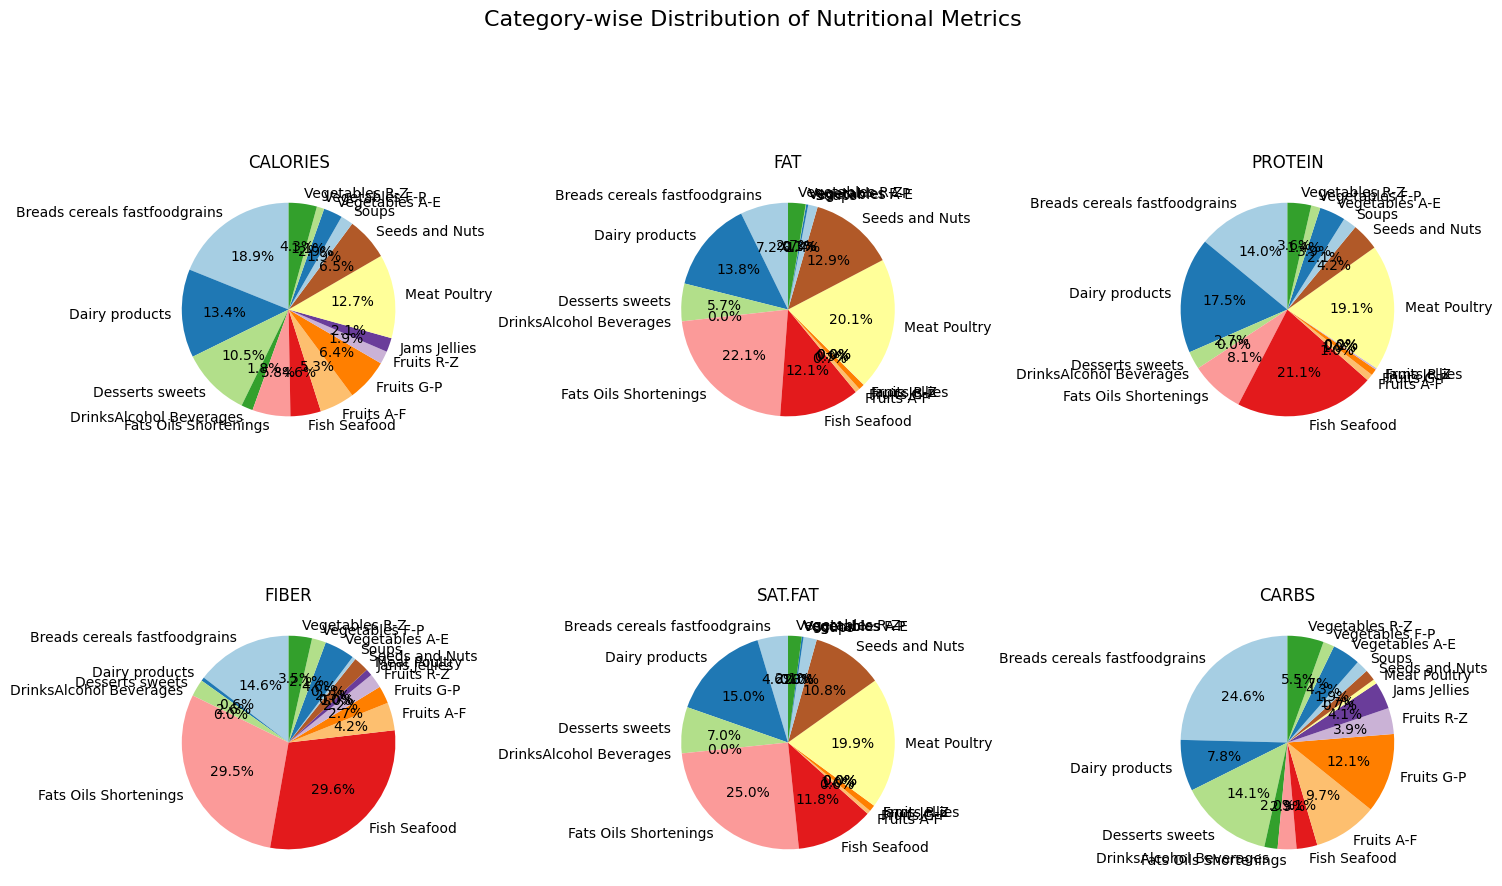

In [49]:
# Group by Category and sum the nutritional metrics
category_dist = nutrients.groupby('Category').sum()

# List of nutrients to plot
metrics = ['Calories', 'Fat', 'Protein', 'Fiber', 'Sat.Fat', 'Carbs']

# Set up a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten axes for easy looping
axes = axes.flatten()

# Define custom colors (limited since matplotlib handles max ~10 pie segments well)
colors = plt.cm.Paired.colors  # or use your own list like ['#100b','#f00560', ...]

# Plot each metric as a pie chart
for i, metric in enumerate(metrics):
    axes[i].pie(
        category_dist[metric],
        labels=category_dist.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(metric.upper())

# Main title
plt.suptitle("Category-wise Distribution of Nutritional Metrics", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
plt.show()

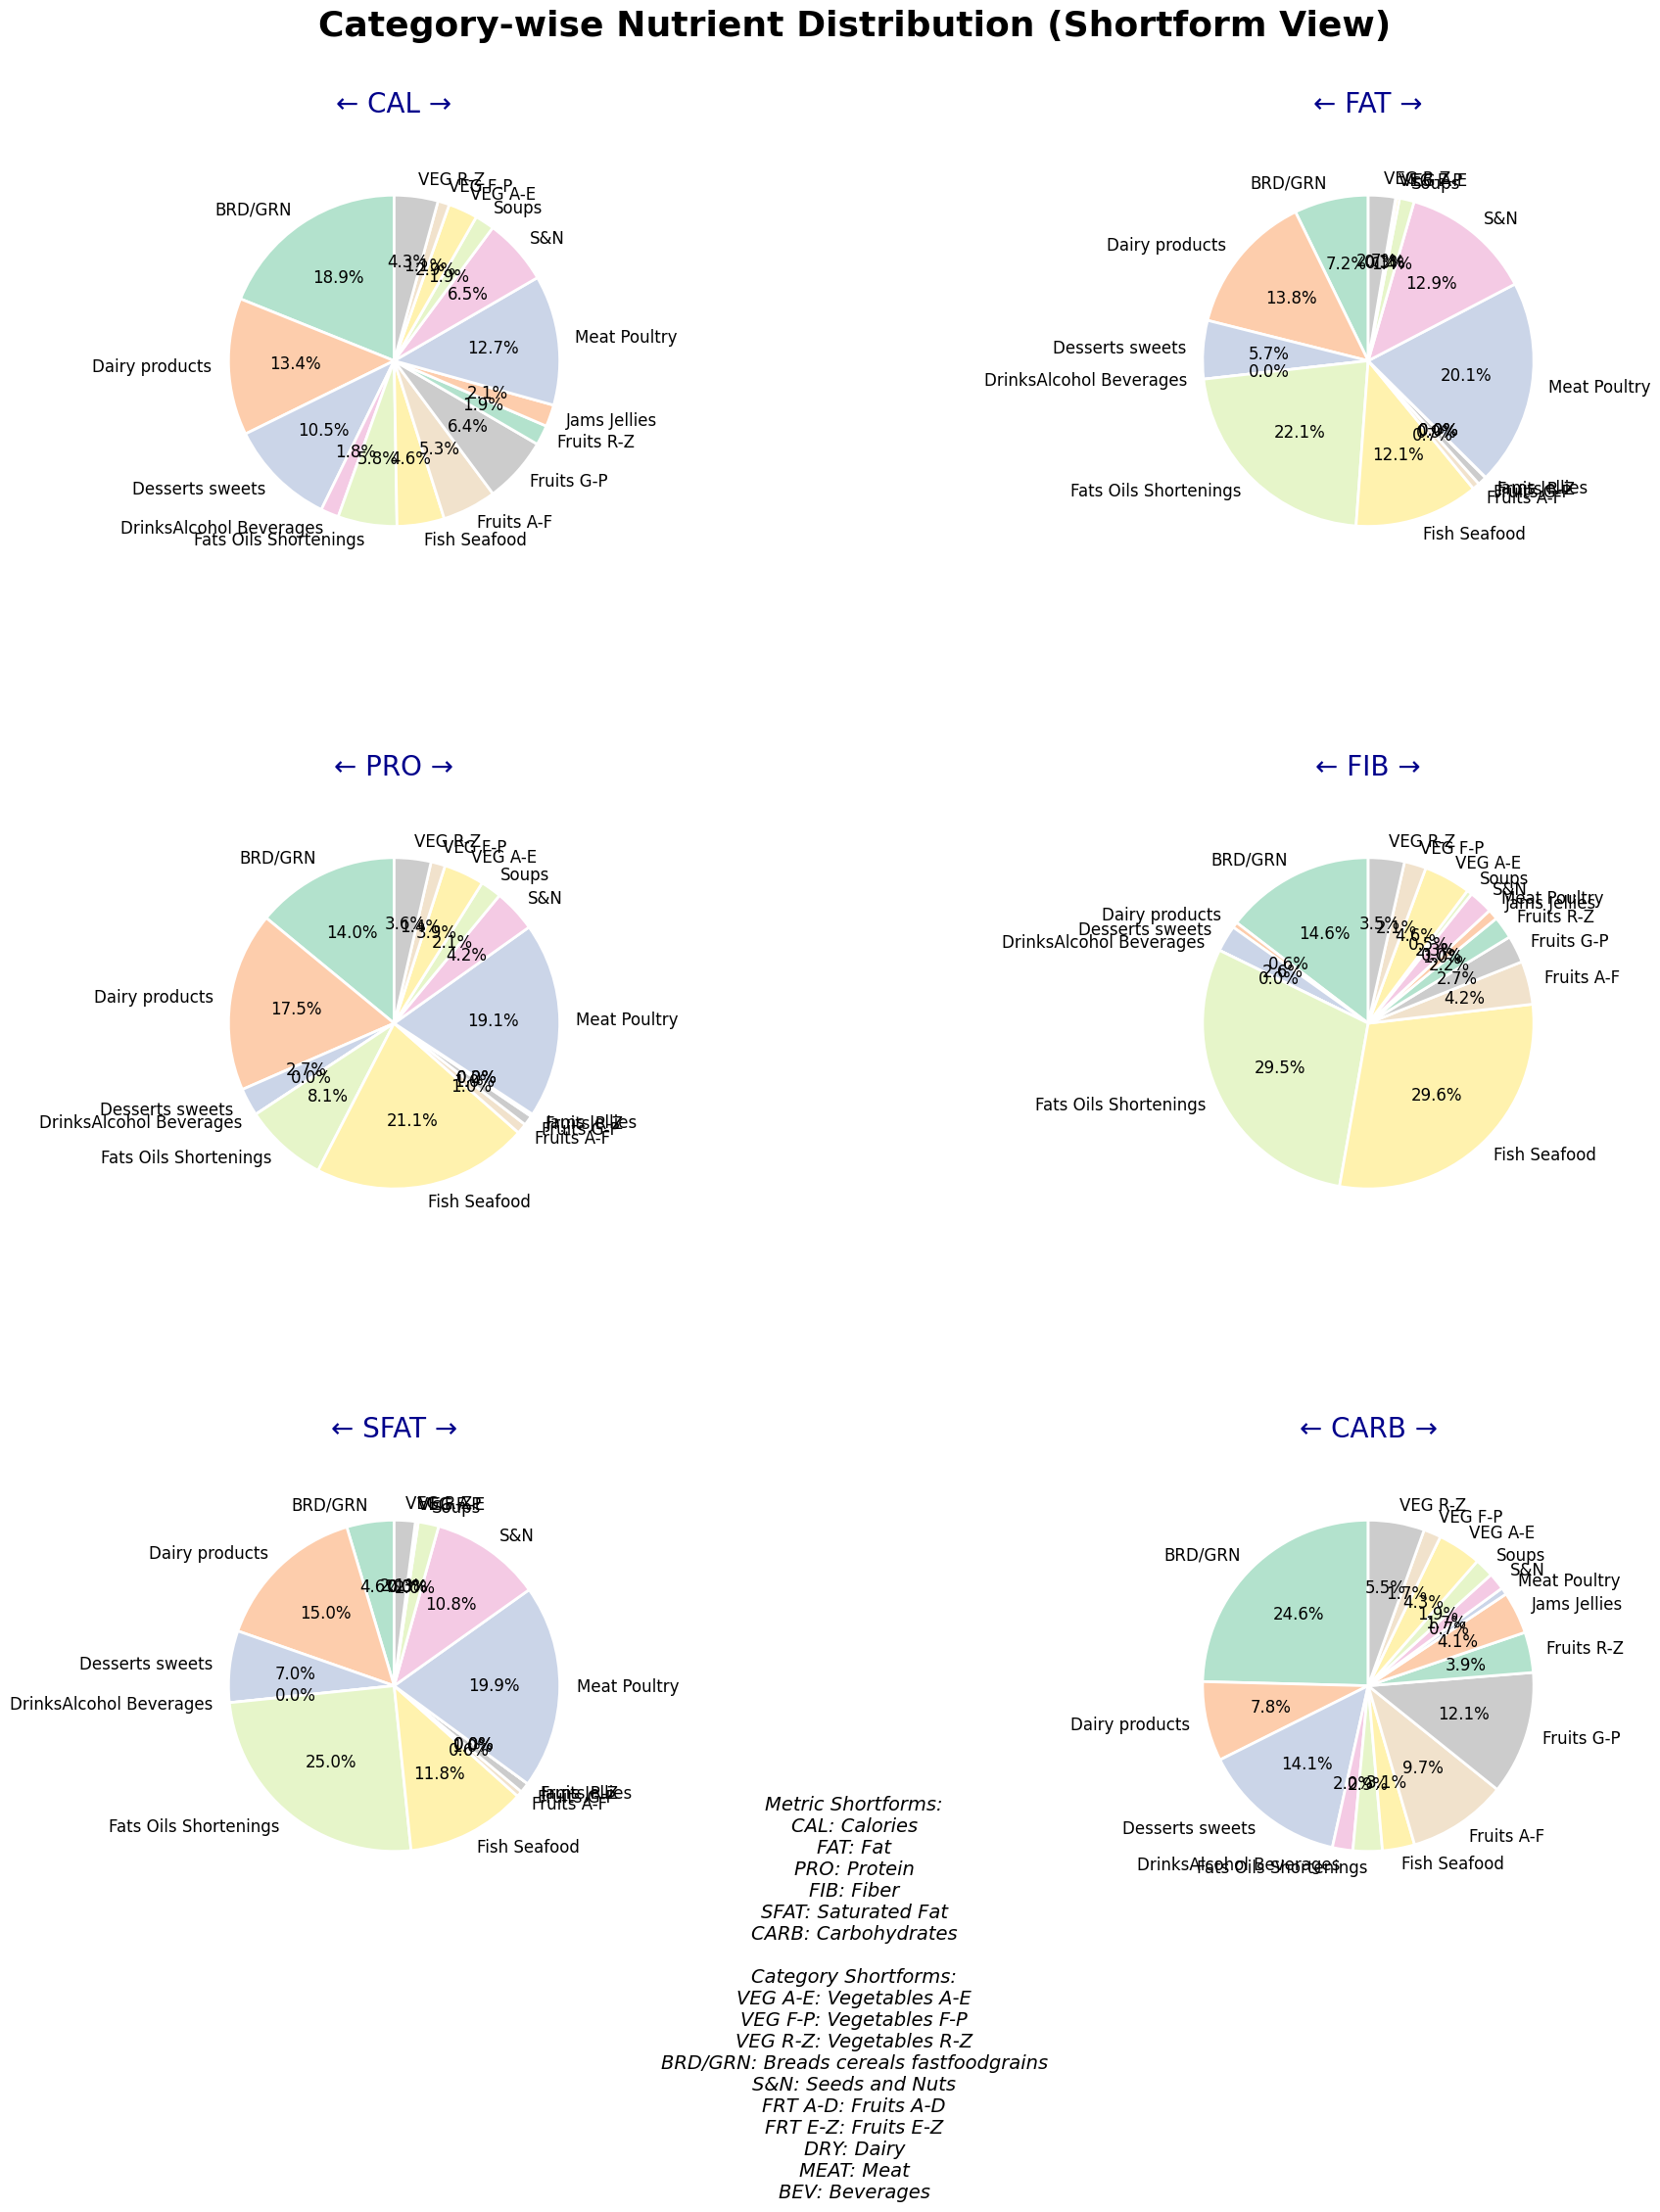

In [50]:
import matplotlib.pyplot as plt

# Step 1: Group data
category_dist = nutrients.groupby('Category').sum()

# Step 2: Replace category names with shortforms
category_shortform_map = {
    'Vegetables A-E': 'VEG A-E',
    'Vegetables F-P': 'VEG F-P',
    'Vegetables R-Z': 'VEG R-Z',
    'Breads cereals fastfoodgrains': 'BRD/GRN',
    'Seeds and Nuts': 'S&N',
    'Fruits A-D': 'FRT A-D',
    'Fruits E-Z': 'FRT E-Z',
    'Dairy': 'DRY',
    'Meat': 'MEAT',
    'Beverages': 'BEV',
    # Add other mappings as needed
}

# Replace the index in category_dist with shortform names
category_dist = category_dist.rename(index=category_shortform_map)

# Step 3: Define metric shortforms and fullforms
metrics = ['Calories', 'Fat', 'Protein', 'Fiber', 'Sat.Fat', 'Carbs']
short_titles = ['CAL', 'FAT', 'PRO', 'FIB', 'SFAT', 'CARB']
metric_fullforms = {
    'CAL': 'Calories',
    'FAT': 'Fat',
    'PRO': 'Protein',
    'FIB': 'Fiber',
    'SFAT': 'Saturated Fat',
    'CARB': 'Carbohydrates'
}

# Step 4: Create figure
fig, axes = plt.subplots(3, 2, figsize=(22, 24))
axes = axes.flatten()
colors = plt.cm.Pastel2.colors

# Step 5: Pie charts with shortform titles
for i, metric in enumerate(metrics):
    wedges, texts, autotexts = axes[i].pie(
        category_dist[metric],
        labels=category_dist.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12},
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
    )
    axes[i].set_title(f"← {short_titles[i]} →", fontsize=20, pad=30, color='darkblue')

# Step 6: Main title
fig.text(0.5, 0.97, "Category-wise Nutrient Distribution (Shortform View)", 
         fontsize=26, fontweight='bold', ha='center')

# Step 7: Add fullform references for metrics and categories
metric_legend = "\n".join([f"{k}: {v}" for k, v in metric_fullforms.items()])
category_legend = "\n".join([f"{v}: {k}" for k, v in category_shortform_map.items()])

fig.text(0.5, 0.05,
         f"Metric Shortforms:\n{metric_legend}\n\nCategory Shortforms:\n{category_legend}",
         fontsize=14, ha='center', style='italic')

# Step 8: Final spacing
plt.subplots_adjust(top=0.92, bottom=0.18, hspace=0.6, wspace=0.4)
plt.show()


## Inferences from the Nutrient Distribution Pie Charts
##### 1.BRD/GRN (Breads, Grains, and Cereals) contribute the highest share of CAL (Calories) and CARB (Carbohydrates), reinforcing their role as primary energy sources.

##### 2.SEA (Seafood) dominates PRO (Protein) content — a standout source of lean protein (sorry vegetarians!).

##### 3.FIB (Fiber) content is evenly distributed between FAT-rich items and SEA, which is unexpected given the typical association of fiber with plant-based foods.

##### 4.S&N (Seeds and Nuts) account for approximately 14% of total FAT, making them a dense source of healthy fats.

##### 5.FRT (Fruits) contribute minimally to most nutrients but show a notable 10% in CARB, likely from natural sugars and fibers.

##### 6.DRY (Dairy) shows a higher share of SFAT (Saturated Fat) at 15%, compared to SEA’s 11.8%, which may have dietary implications.

# Analyzing the Drinks, Alcohol, Beverages and Desserts

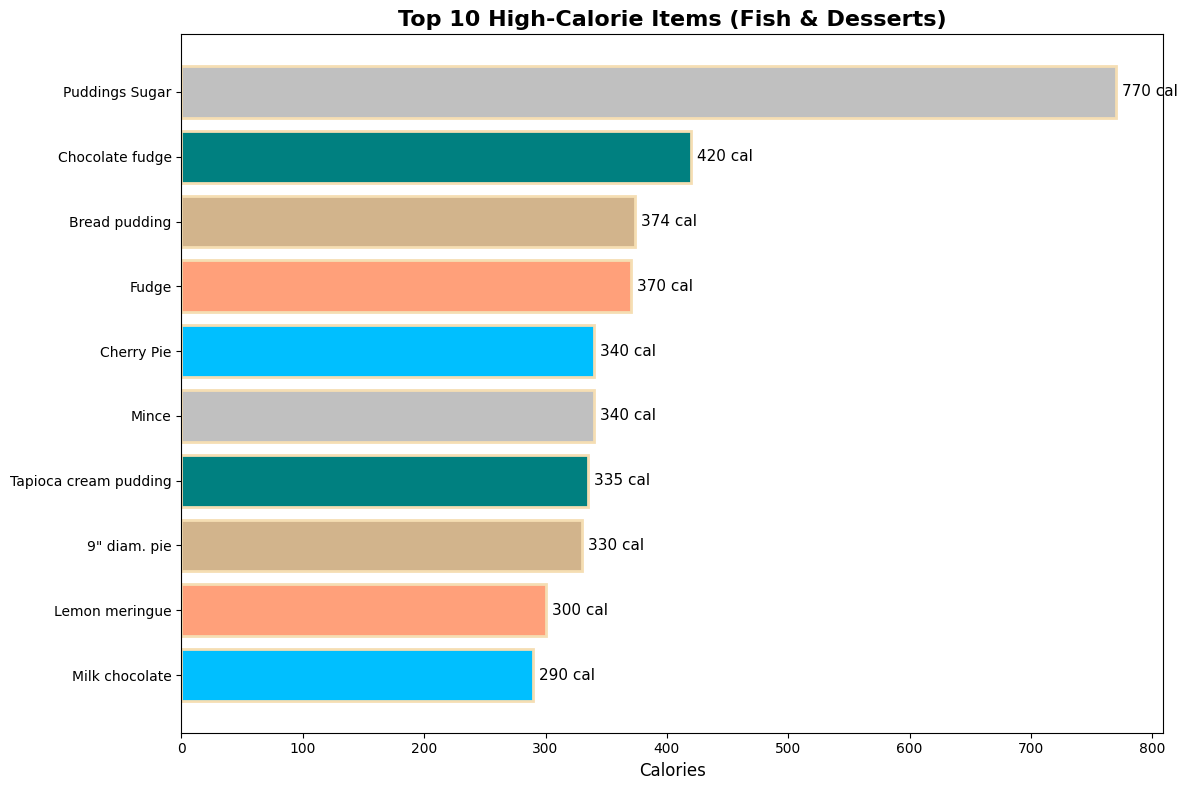

In [51]:
# Filter for Fish Seafood and Desserts sweets
drinks = nutrients[nutrients['Category'].isin(['Fish Seafood', 'Desserts sweets'])]

# Sort by Calories and pick Top 10
drinks_top = drinks.sort_values(by='Calories', ascending=False).head(10)

# Sort again for ascending Calories to make the bars appear top-down in order
drinks_top = drinks_top.sort_values(by='Calories')

# Bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(drinks_top['Food'], drinks_top['Calories'],
                color=['deepskyblue', 'lightsalmon', 'tan', 'teal', 'silver']*2,
                edgecolor='wheat', linewidth=2)

# Add value labels at the end of bars
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f} cal", va='center', fontsize=11)

# Labels and Title
plt.xlabel("Calories", fontsize=12)
plt.title("Top 10 High-Calorie Items (Fish & Desserts)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

So, pudding has the most amount of calories followed by chocolate fudge.

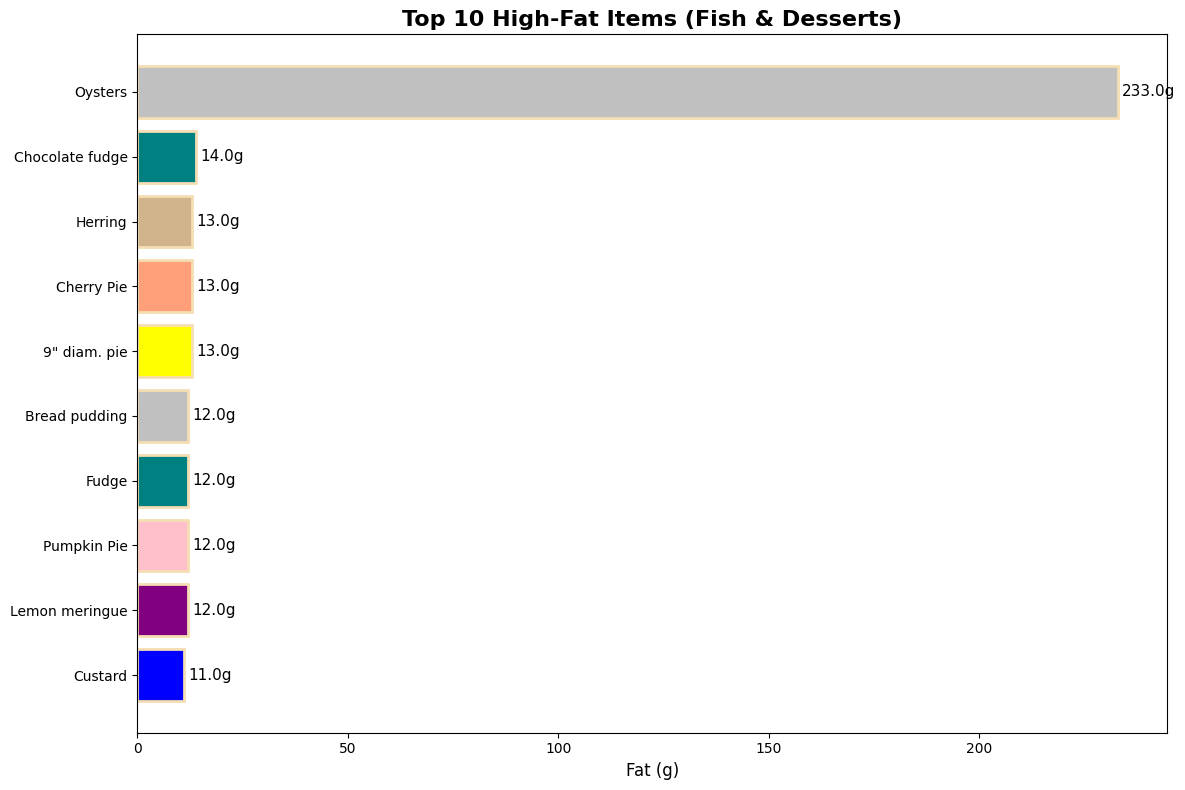

In [52]:
# Step 1: Filter and sort
drinks = nutrients[nutrients['Category'].isin(['Fish Seafood', 'Desserts sweets'])]
drinks_fatty = drinks.sort_values(by='Fat', ascending=False).head(10)

# Step 2: Sort for proper top-down bar order
drinks_fatty = drinks_fatty.sort_values(by='Fat')

# Step 3: Custom colors (reusing your Plotly style)
bar_colors = ["blue", "purple", "pink", "teal", "silver",
              "yellow", "lightsalmon", "tan", "teal", "silver"]

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(drinks_fatty['Food'], drinks_fatty['Fat'], 
                color=bar_colors, edgecolor='wheat', linewidth=2)

# Step 5: Add value labels to the end of bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}g", va='center', fontsize=11)

# Step 6: Labeling
plt.xlabel("Fat (g)", fontsize=12)
plt.title("Top 10 High-Fat Items (Fish & Desserts)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

1.Oysters have an exceptionally high fat content (233g), making them a massive outlier in this group.

2.Most dessert items (like Chocolate Fudge, Cherry Pie, and Pumpkin Pie) have a fat range between 11g to 14g, indicating moderate but significant fat levels.

3.Herring, another seafood item, is also relatively high in fat (13g), due to its natural oils.

4.Custard, Lemon Meringue, and other sweets fall in the 11–12g range, still contributing significantly to overall dietary fat intake.

# Analyzing meat, poultry , seafood.

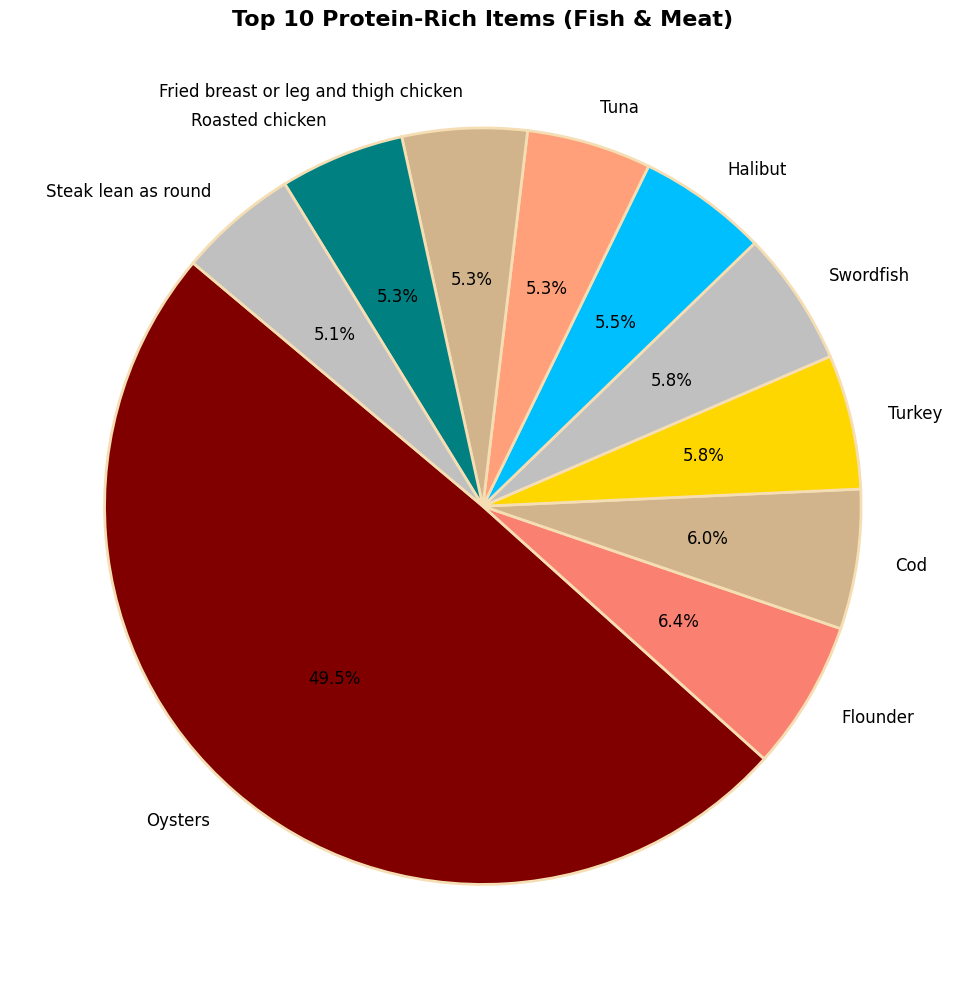

In [53]:
# Step 1: Filter Fish and Meat category
meat = nutrients[nutrients['Category'].isin(['Fish Seafood', 'Meat Poultry'])]

# Step 2: Sort by Protein and get Top 10
meats_top = meat.sort_values(by='Protein', ascending=False).head(10)

# Step 3: Pie chart
colors = ["maroon", "salmon", "tan", "gold", "silver",
          "deepskyblue", "lightsalmon", "tan", "teal", "silver"]

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(meats_top['Protein'],
                                   labels=meats_top['Food'],
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=colors,
                                   wedgeprops={'linewidth': 2, 'edgecolor': 'wheat'},
                                   textprops={'fontsize': 12})

# Title
plt.title("Top 10 Protein-Rich Items (Fish & Meat)", fontsize=16, fontweight='bold')

# Show chart
plt.tight_layout()
plt.show()


## Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.

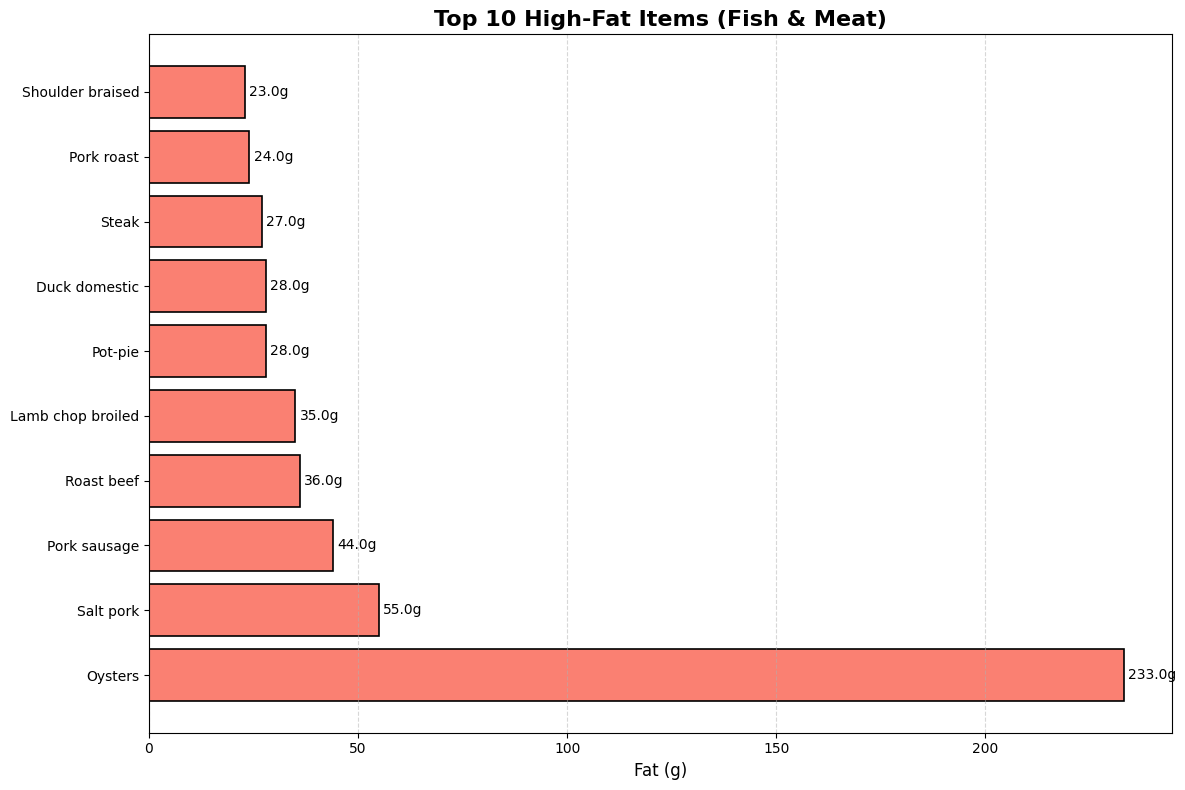

In [54]:
# Step 1: Filter for fish and meat
meat = nutrients[nutrients['Category'].isin(['Fish Seafood', 'Meat Poultry'])]

# Step 2: Sort and select top 10 by fat content
top_10_fattest = meat.sort_values(by='Fat', ascending=False).head(10)

# Step 3: Plotting horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_fattest['Food'], top_10_fattest['Fat'],
                color='salmon', edgecolor='black', linewidth=1.2)

# Step 4: Add fat values to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, 
             bar.get_y() + bar.get_height() / 2, 
             f"{bar.get_width():.1f}g", 
             va='center', fontsize=10)

# Step 5: Customize the chart
plt.xlabel("Fat (g)", fontsize=12)
plt.title("Top 10 High-Fat Items (Fish & Meat)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the chart
plt.show()

# 🥩 Top 10 High-Fat Items (Fish & Meat)

## 🔍 Key Observations

- **Oysters** top the list with an exceptionally high fat content (**233g**), making it a major outlier.
- **Salt pork** and **Pork sausage** also have very high fat levels, common in processed meats.
- **Roast beef**, **Lamb chops**, and **Duck** are moderate in fat but still rich compared to lean meats.
- Items like **Pot-pie** and **Steak** are close in fat to traditional meats due to ingredients or cooking method.
- This ranking helps identify foods to moderate in high-fat diets.

## 📊 Fat Content Table

| Rank | Food Item         | Fat (g) |
|------|-------------------|---------|
| 1    | Oysters           | 233.0   |
| 2    | Salt pork         | 55.0    |
| 3    | Pork sausage      | 44.0    |
| 4    | Roast beef        | 36.0    |
| 5    | Lamb chop broiled | 35.0    |
| 6    | Pot-pie           | 28.0    |
| 7    | Duck domestic     | 28.0    |
| 8    | Steak             | 27.0    |
| 9    | Pork roast        | 24.0    |
| 10   | Shoulder braised  | 23.0    |

In [55]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232.0,233.0,234.0,235.0,236.0,Fish Seafood
42,Salt pork,2 oz.,60,470.0,3.0,55.0,NaN,0.0,0.0,Meat Poultry
78,Halibut,3 1/2 oz.,100,182.0,26.0,8.0,0.0,0.0,0.0,Fish Seafood
70,Veal,3 oz.,85,185.0,23.0,9.0,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13.0,14.0,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12.0,1.0,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28.0,5.0,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14.0,2.0,0.0,0.0,1.0,Fish Seafood
75,Fish sticks fried,5,112,200.0,19.0,10.0,5.0,0.0,8.0,Fish Seafood
76,Flounder,3 1/2 oz.,100,200.0,30.0,8.0,0.0,0.0,0.0,Fish Seafood


# Final Conclusion – Nutritional Data Analysis Report

The dataset contains information on **335 food items** across various nutritional categories such as:
- Calories
- Protein (g)
- Fat (g)
- Saturated Fat (Sat.Fat)
- Carbohydrates (Carbs)
- Fiber (g)

The data spans **multiple food groups**, including:
- Dairy Products
- Vegetables
- Fruits
- Seeds & Nuts
- Breads, Cereals, Grains
- Fish & Meat
- Sweets & Desserts

---

## Key Insights

1. **High-Calorie Sources**:
   - Items in the **Breads, Cereals, and Grains** category had the **highest calorie content**, primarily due to high carb levels.

2. **Protein-Rich Foods**:
   - **Seafood** items dominated the protein chart, significantly outpacing vegetarian sources.
   - The top 10 protein-rich foods are almost entirely **animal-based**.

3. **Carbohydrate-Rich Foods**:
   - **Grains and Fruits** contributed most to the carb count.
   - Surprisingly, **Fruits** showed moderate levels, not extremely high.

4. **Fat Content**:
   - **Oysters** (Fish) and **Salt Pork** (Meat) had the **highest fat values**.
   - **Seeds and Nuts** showed notable fat content, particularly healthy fats.

5. **Saturated Fat**:
   - **Dairy** and **Seafood** topped the saturated fat charts.
   - **Dairy products** like cheese and butter had higher saturated fat compared to meats.

6. **Fiber Distribution**:
   - **Vegetables** and **Fruits** provided the most dietary fiber.
   - Processed items such as pies and pastries had negligible fiber content.

7. **Desserts & Sweets**:
   - Ranked high in **both fat and calorie content**.
   - Popular items like **chocolate fudge** and **custard** are dense in calories with minimal nutritional balance.

---

##  Overall Conclusion

- Foods high in **nutritional density** (e.g., seafood, seeds, vegetables) offer greater health benefits.
- **Processed and dessert items** dominate the charts for fat and calorie content but offer little fiber or protein.
- For a **balanced diet**, a combination of **lean meats, legumes, whole grains, fruits, and vegetables** is ideal.
- This analysis can assist in **diet planning**, **caloric control**, and **macronutrient balance** across different dietary needs (e.g., high-protein, low-fat, high-fiber).

---